In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Eksplorasi Data

In [2]:
data=pd.read_csv('ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')
data

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.80,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.40,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.40,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.10,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.00,70.0,79.7,132,63,31,105,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,...,0,5.30,73.0,122.6,127,74,24,102,0,9
487,1,45,0,0,0,0,1,0,1,0,...,0,5.90,67.0,110.3,150,112,33,94,0,8
488,1,44,1,0,0,0,0,1,1,1,...,0,6.41,66.3,111.6,126,83,35,0,0,0
489,1,41,0,0,1,1,1,1,0,1,...,1,4.00,93.0,87.6,119,66,22,35,1,3


In [3]:
# Menghapus kolom yang tidak diperlukan
data.drop(['TIME_YEAR','TimeToEventMonths'],inplace=True,axis=1)
data

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
0,0,64,0,0,0,0,1,1,1,1,0,1,0,4.80,59.0,93.3,144,87,40,0
1,0,52,0,0,0,0,1,1,1,0,0,1,0,6.40,52.0,105.8,148,91,45,0
2,0,56,0,0,0,0,1,1,1,1,0,1,0,6.40,57.0,99.8,149,86,41,0
3,0,58,0,0,0,0,0,1,1,1,0,0,0,5.10,65.0,90.3,116,68,32,0
4,0,63,1,0,0,0,1,1,1,1,1,1,1,5.00,70.0,79.7,132,63,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,0,0,0,5.30,73.0,122.6,127,74,24,0
487,1,45,0,0,0,0,1,0,1,0,0,0,0,5.90,67.0,110.3,150,112,33,0
488,1,44,1,0,0,0,0,1,1,1,1,0,0,6.41,66.3,111.6,126,83,35,0
489,1,41,0,0,1,1,1,1,0,1,0,1,1,4.00,93.0,87.6,119,66,22,1


In [4]:
# Menampilkan informasi tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

In [5]:
# Menampilkan ringkasan statistik dataset
data.describe()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,0.551935,0.327902,0.617108,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,0.114053
std,0.500426,13.821282,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,0.497803,0.469928,0.486588,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,0.318200
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,0.000000
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,0.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,1.000000


In [6]:
# Menampilkan jumlah nilai yang hilang (missing values) dalam dataset
data.isna().sum()

Sex                    0
AgeBaseline            0
HistoryDiabetes        0
HistoryCHD             0
HistoryVascular        0
HistorySmoking         0
HistoryHTN             0
HistoryDLD             0
HistoryObesity         0
DLDmeds                0
DMmeds                 0
HTNmeds                0
ACEIARB                0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
EventCKD35             0
dtype: int64

In [7]:
# Menampilkan jumlah duplikat dalam dataset
data.duplicated().sum()

0

In [8]:
# Menampilkan jumlah nilai pada kolom 'EventCKD35'
data['EventCKD35'].value_counts()

0    435
1     56
Name: EventCKD35, dtype: int64

# Splitting data between categoric values and numeric values

In [9]:
num_col=['AgeBaseline','CholesterolBaseline','CreatinineBaseline','eGFRBaseline','sBPBaseline','dBPBaseline','BMIBaseline']
cat_col=list(set(data.columns)-set(num_col))

In [10]:
# Menentukan kolom numerik
num_col

['AgeBaseline',
 'CholesterolBaseline',
 'CreatinineBaseline',
 'eGFRBaseline',
 'sBPBaseline',
 'dBPBaseline',
 'BMIBaseline']

In [11]:
# Menentukan kolom kategorikal
cat_col

['ACEIARB',
 'HistoryCHD',
 'HistoryDLD',
 'DMmeds',
 'HistoryObesity',
 'HistoryVascular',
 'HTNmeds',
 'DLDmeds',
 'EventCKD35',
 'HistoryHTN ',
 'Sex',
 'HistorySmoking',
 'HistoryDiabetes']

In [12]:
# Memisahkan kolom numerik dan kategorikal dalam dataset
num_features=data.drop(cat_col,axis=1)
cat_features=data.drop(num_col,axis=1)
cat_features.drop(['EventCKD35'],axis=1,inplace=True)

In [13]:
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144,87,40
1,52,6.40,52.0,105.8,148,91,45
2,56,6.40,57.0,99.8,149,86,41
3,58,5.10,65.0,90.3,116,68,32
4,63,5.00,70.0,79.7,132,63,31
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127,74,24
487,45,5.90,67.0,110.3,150,112,33
488,44,6.41,66.3,111.6,126,83,35
489,41,4.00,93.0,87.6,119,66,22


In [14]:
cat_features

,Sex,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB
0,0,0,0,0,0,1,1,1,1,0,1,0
1,0,0,0,0,0,1,1,1,0,0,1,0
2,0,0,0,0,0,1,1,1,1,0,1,0
3,0,0,0,0,0,0,1,1,1,0,0,0
4,0,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,0,0,0,0,0,0,0,0,0,0,0
487,1,0,0,0,0,1,0,1,0,0,0,0
488,1,1,0,0,0,0,1,1,1,1,0,0
489,1,0,0,1,1,1,1,0,1,0,1,1


In [15]:
target=data['EventCKD35']
target

0      0
1      0
2      0
3      0
4      0
      ..
486    0
487    0
488    0
489    1
490    0
Name: EventCKD35, Length: 491, dtype: int64

# Visualisasi Data

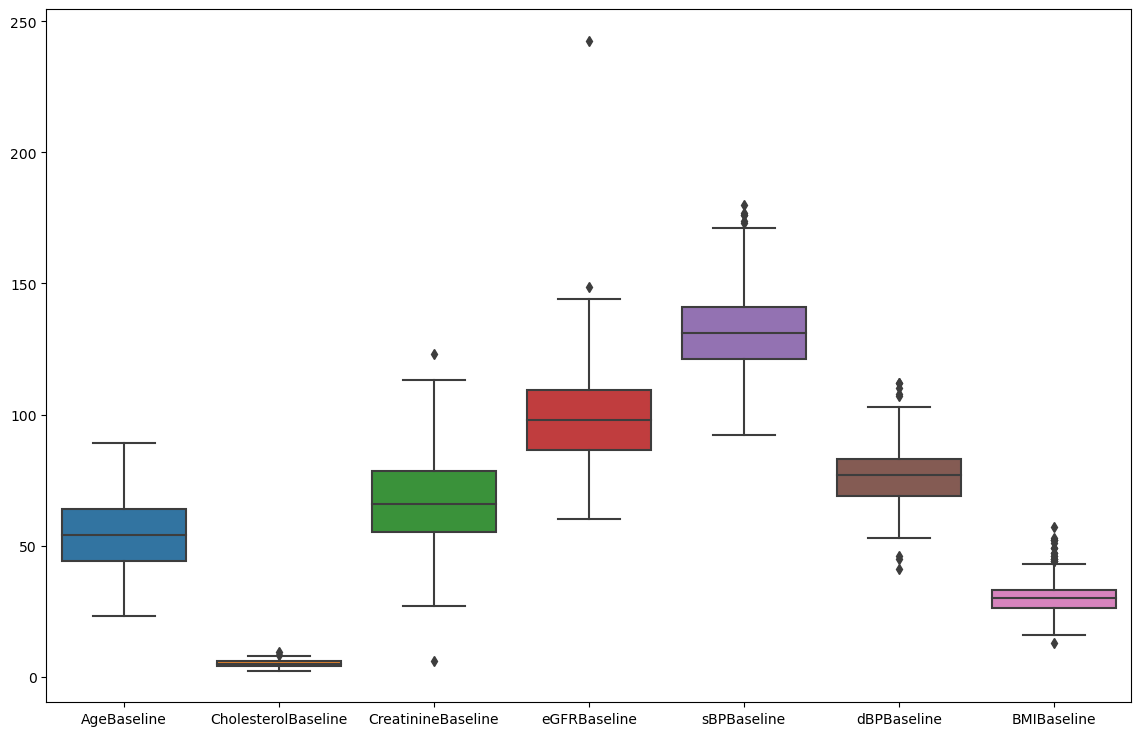

In [16]:
# Box plot
plt.figure(figsize=(14,9))
sns.boxplot(data=num_features)
plt.show()

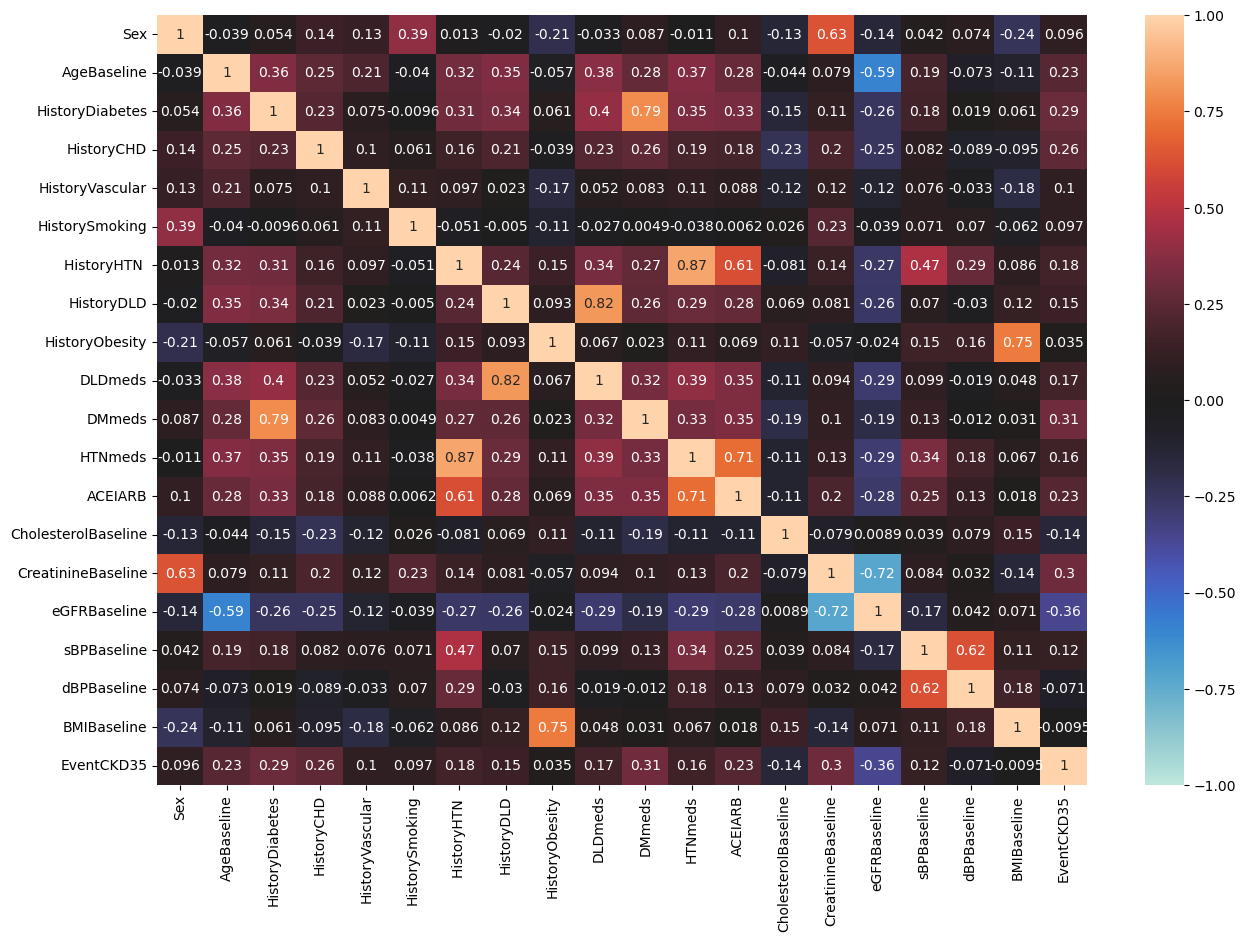

In [17]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

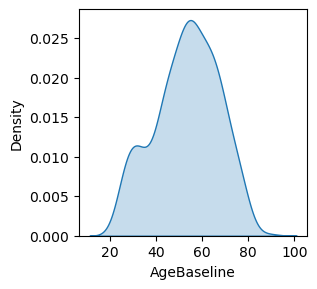

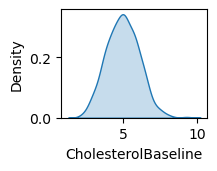

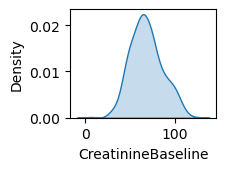

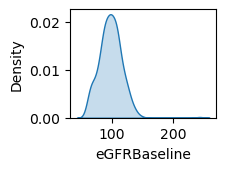

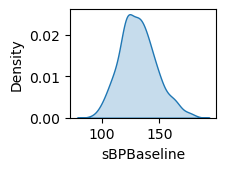

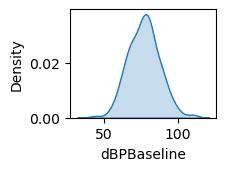

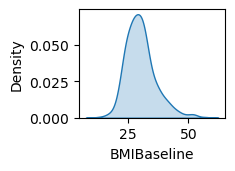

In [18]:
plt.figure(figsize=(10, 10))
for i in range(len(num_features.columns)):
    ax = plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=num_features,x=num_features.columns[i],shade=True) 
    plt.show()

# Handling Outlier 

In [19]:
#define IQR to remove data outlier
Q1 = num_features.quantile(q=.25)
Q3 = num_features.quantile(q=.75)
IQR = Q3 - Q1
print(IQR)

AgeBaseline            20.00
CholesterolBaseline     1.57
CreatinineBaseline     23.50
eGFRBaseline           23.10
sBPBaseline            20.00
dBPBaseline            14.00
BMIBaseline             7.00
dtype: float64


In [20]:
# Menghapus outlier berdasarkan IQR
num_features = num_features[~((num_features<(Q1-1.5*IQR)) | (num_features>(Q3+1.5*IQR)))]
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144.0,87.0,40.0
1,52,6.40,52.0,105.8,148.0,91.0,NaN
2,56,6.40,57.0,99.8,149.0,86.0,41.0
3,58,5.10,65.0,90.3,116.0,68.0,32.0
4,63,5.00,70.0,79.7,132.0,63.0,31.0
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127.0,74.0,24.0
487,45,5.90,67.0,110.3,150.0,NaN,33.0
488,44,6.41,66.3,111.6,126.0,83.0,35.0
489,41,4.00,93.0,87.6,119.0,66.0,22.0


In [21]:
num_features.isna().sum()

AgeBaseline             0
CholesterolBaseline     2
CreatinineBaseline      2
eGFRBaseline            2
sBPBaseline             6
dBPBaseline             8
BMIBaseline            19
dtype: int64

In [22]:
num_features.interpolate(inplace=True)
num_features

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
0,64,4.80,59.0,93.3,144.0,87.0,40.0
1,52,6.40,52.0,105.8,148.0,91.0,40.5
2,56,6.40,57.0,99.8,149.0,86.0,41.0
3,58,5.10,65.0,90.3,116.0,68.0,32.0
4,63,5.00,70.0,79.7,132.0,63.0,31.0
...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127.0,74.0,24.0
487,45,5.90,67.0,110.3,150.0,78.5,33.0
488,44,6.41,66.3,111.6,126.0,83.0,35.0
489,41,4.00,93.0,87.6,119.0,66.0,22.0


In [23]:
num_features.isna().sum()

AgeBaseline            0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
dtype: int64

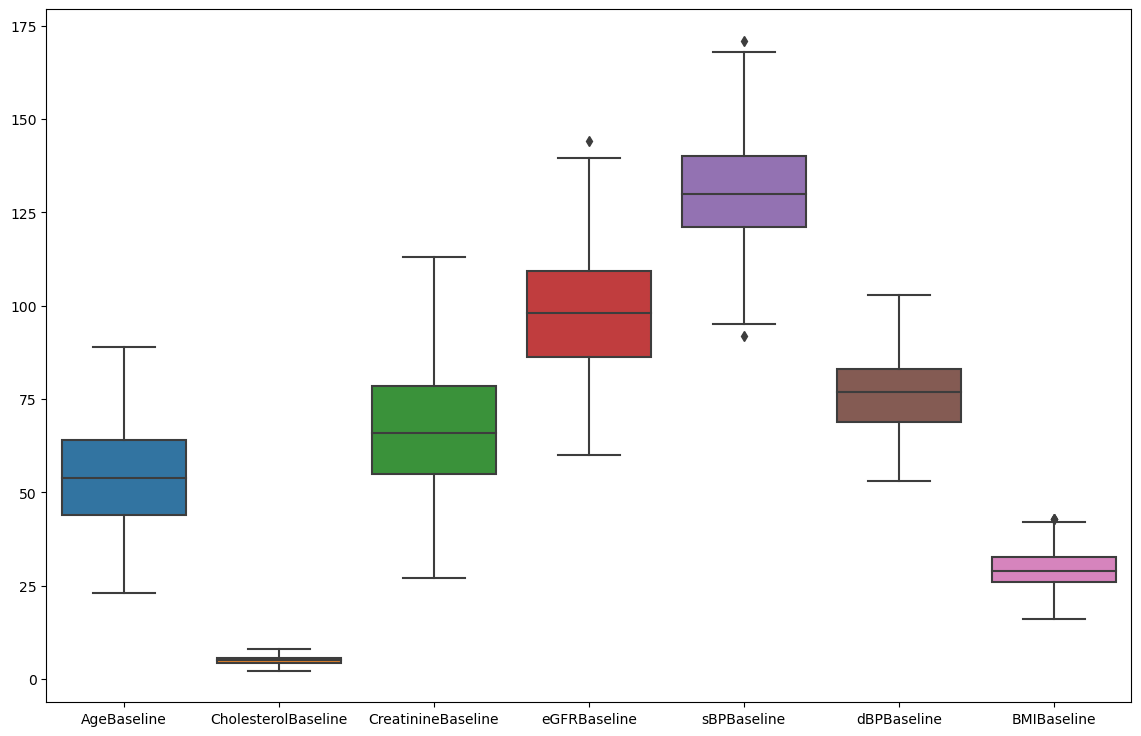

In [24]:
# Menampilkan box plot setelah mengatasi outlier
plt.figure(figsize=(14,9))
sns.boxplot(data=num_features)
plt.show()

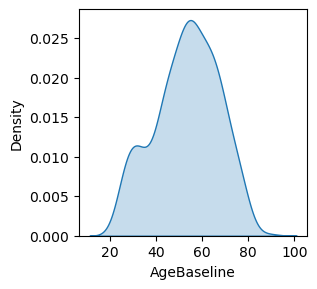

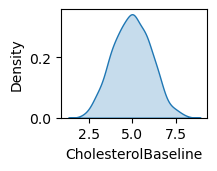

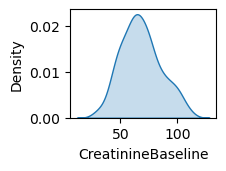

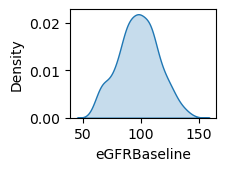

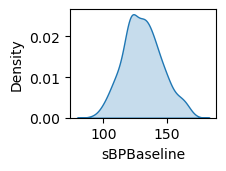

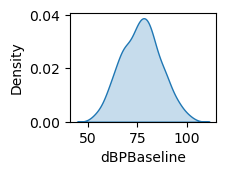

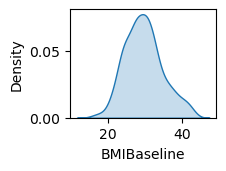

In [25]:
plt.figure(figsize=(10, 10))
for i in range(len(num_features.columns)):
    ax = plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=num_features,x=num_features.columns[i],shade=True) 
    plt.show()

In [26]:
data=pd.concat([num_features,cat_features,target],axis=1)
data

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,Sex,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,EventCKD35
0,64,4.80,59.0,93.3,144.0,87.0,40.0,0,0,0,0,0,1,1,1,1,0,1,0,0
1,52,6.40,52.0,105.8,148.0,91.0,40.5,0,0,0,0,0,1,1,1,0,0,1,0,0
2,56,6.40,57.0,99.8,149.0,86.0,41.0,0,0,0,0,0,1,1,1,1,0,1,0,0
3,58,5.10,65.0,90.3,116.0,68.0,32.0,0,0,0,0,0,0,1,1,1,0,0,0,0
4,63,5.00,70.0,79.7,132.0,63.0,31.0,0,1,0,0,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127.0,74.0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0
487,45,5.90,67.0,110.3,150.0,78.5,33.0,1,0,0,0,0,1,0,1,0,0,0,0,0
488,44,6.41,66.3,111.6,126.0,83.0,35.0,1,1,0,0,0,0,1,1,1,1,0,0,0
489,41,4.00,93.0,87.6,119.0,66.0,22.0,1,0,0,1,1,1,1,0,1,0,1,1,1


# Feature Selection by pearson correlation

In [27]:
corr = data.corr()
corr

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,Sex,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,EventCKD35
AgeBaseline,1.000000,-0.046629,0.097758,-0.657468,0.186735,-0.073179,-0.077923,-0.038629,0.355358,0.250932,0.207795,-0.039886,0.318647,0.353233,-0.057091,0.379911,0.275631,0.366661,0.282325,0.234616
CholesterolBaseline,-0.046629,1.000000,-0.111886,0.050001,0.041993,0.056563,0.127867,-0.133754,-0.139458,-0.234818,-0.133571,0.031379,-0.082502,0.062822,0.108004,-0.105353,-0.186469,-0.114848,-0.120557,-0.141952
CreatinineBaseline,0.097758,-0.111886,1.000000,-0.715205,0.054277,0.014228,-0.130725,0.649104,0.131269,0.202824,0.155500,0.235029,0.142485,0.084916,-0.073226,0.098889,0.123335,0.135267,0.207856,0.305562
eGFRBaseline,-0.657468,0.050001,-0.715205,1.000000,-0.153992,0.051798,0.038278,-0.164753,-0.293498,-0.263369,-0.201412,-0.032975,-0.298587,-0.292822,-0.011956,-0.318659,-0.230613,-0.326136,-0.313203,-0.378978
sBPBaseline,0.186735,0.041993,0.054277,-0.153992,1.000000,0.546145,0.133426,0.026041,0.198925,0.096805,0.088343,0.068215,0.468113,0.083477,0.179285,0.114167,0.141384,0.326700,0.228687,0.132844
dBPBaseline,-0.073179,0.056563,0.014228,0.051798,0.546145,1.000000,0.150178,0.045308,0.020832,-0.061628,-0.032966,0.025487,0.278120,-0.035642,0.188790,-0.031407,0.000330,0.175728,0.137632,-0.073855
BMIBaseline,-0.077923,0.127867,-0.130725,0.038278,0.133426,0.150178,1.000000,-0.257751,0.051961,-0.078824,-0.170477,-0.145090,0.120116,0.124765,0.782931,0.080395,0.011363,0.105622,0.041180,-0.009273
Sex,-0.038629,-0.133754,0.649104,-0.164753,0.026041,0.045308,-0.257751,1.000000,0.053618,0.142435,0.125019,0.394242,0.012510,-0.020486,-0.205935,-0.032636,0.086995,-0.010703,0.102390,0.095953
HistoryDiabetes,0.355358,-0.139458,0.131269,-0.293498,0.198925,0.020832,0.051961,0.053618,1.000000,0.231845,0.074903,-0.009598,0.311326,0.336353,0.060802,0.398992,0.791391,0.348969,0.331198,0.290294
HistoryCHD,0.250932,-0.234818,0.202824,-0.263369,0.096805,-0.061628,-0.078824,0.142435,0.231845,1.000000,0.100073,0.061342,0.156116,0.205819,-0.038530,0.229420,0.259290,0.192120,0.183593,0.263532


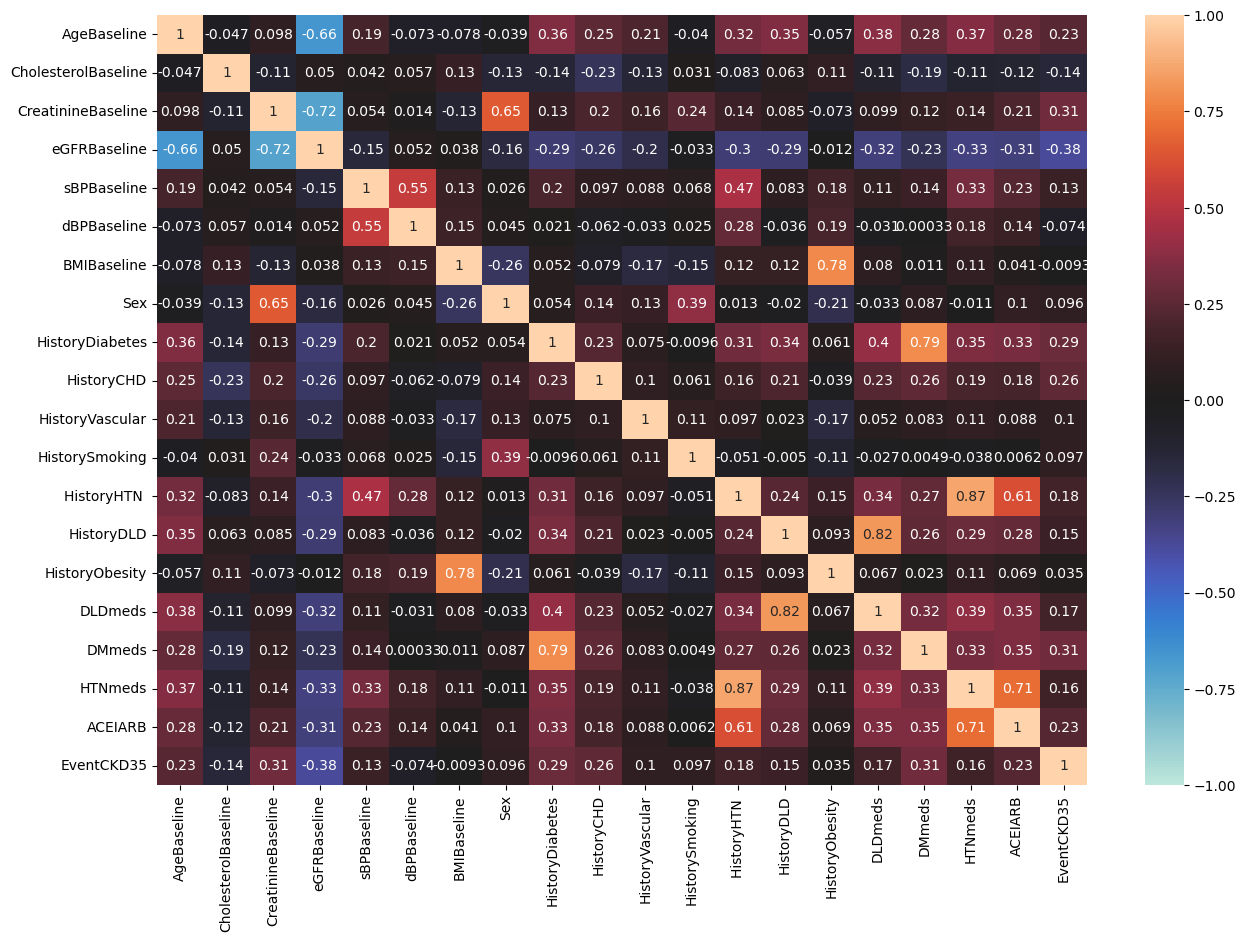

In [28]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [29]:
corr_target=corr['EventCKD35']
corr_target

AgeBaseline            0.234616
CholesterolBaseline   -0.141952
CreatinineBaseline     0.305562
eGFRBaseline          -0.378978
sBPBaseline            0.132844
dBPBaseline           -0.073855
BMIBaseline           -0.009273
Sex                    0.095953
HistoryDiabetes        0.290294
HistoryCHD             0.263532
HistoryVascular        0.100355
HistorySmoking         0.096994
HistoryHTN             0.176038
HistoryDLD             0.145270
HistoryObesity         0.034791
DLDmeds                0.168671
DMmeds                 0.308959
HTNmeds                0.163995
ACEIARB                0.232300
EventCKD35             1.000000
Name: EventCKD35, dtype: float64

In [30]:
#corr_target.drop(['HTNmeds'],axis=0,inplace=True)
#corr_target

In [31]:
good_col=[]
for i in corr_target.index:
    if np.abs(corr_target[i]) >= 0.1:
        good_col.append(i)
good_col

['AgeBaseline',
 'CholesterolBaseline',
 'CreatinineBaseline',
 'eGFRBaseline',
 'sBPBaseline',
 'HistoryDiabetes',
 'HistoryCHD',
 'HistoryVascular',
 'HistoryHTN ',
 'HistoryDLD',
 'DLDmeds',
 'DMmeds',
 'HTNmeds',
 'ACEIARB',
 'EventCKD35']

In [32]:
len(good_col)

15

In [33]:
col_to_drop=list(set(data.columns)-set(good_col))
col_to_drop

['HistoryObesity', 'BMIBaseline', 'HistorySmoking', 'dBPBaseline', 'Sex']

In [34]:
data.drop(col_to_drop,axis=1,inplace=True)
data

,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistoryHTN,HistoryDLD,DLDmeds,DMmeds,HTNmeds,ACEIARB,EventCKD35
0,64,4.80,59.0,93.3,144.0,0,0,0,1,1,1,0,1,0,0
1,52,6.40,52.0,105.8,148.0,0,0,0,1,1,0,0,1,0,0
2,56,6.40,57.0,99.8,149.0,0,0,0,1,1,1,0,1,0,0
3,58,5.10,65.0,90.3,116.0,0,0,0,0,1,1,0,0,0,0
4,63,5.00,70.0,79.7,132.0,1,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,25,5.30,73.0,122.6,127.0,0,0,0,0,0,0,0,0,0,0
487,45,5.90,67.0,110.3,150.0,0,0,0,1,0,0,0,0,0,0
488,44,6.41,66.3,111.6,126.0,1,0,0,0,1,1,1,0,0,0
489,41,4.00,93.0,87.6,119.0,0,0,1,1,1,1,0,1,1,1


# Scaling Data

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Membangun model Neural Network

In [36]:
from tensorflow import keras

In [37]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [38]:
# Fungsi untuk membangun model MLP
def MLP_model(n_neurons_dense=(16,8),activation_dense='relu',n_layers_dense=2,activation_output='sigmoid',lr=1e-3):
    model=keras.models.Sequential()
    for i in range(n_layers_dense):
        if i==0:
            model.add(keras.layers.Dense(n_neurons_dense[i],activation=activation_dense,input_shape=(X.shape[1],)))
        else:
            model.add(keras.layers.Dense(n_neurons_dense[i],activation=activation_dense))
    model.add(keras.layers.Dense(1,activation=activation_output))
    opt = keras.optimizers.Adam(learning_rate=lr,weight_decay=1e-2)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [39]:
# Membangun model MLP
model=MLP_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


# Cross Validation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
# Inisialisasi SMOTE
sm=SMOTE(random_state=42) 

In [41]:
# Fungsi untuk melakukan cross validation
def cross_validation(X,y,n_split=3,n_iter=5):
    score_list=[]
    score_mean_list=[]
    print('=== CROSS VALIDATE START ===')
    for i in range(n_split):
        score_each_split=[]
        for j in range(n_iter):
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1*(i+1),random_state=42)
            X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)
            num_col=['AgeBaseline','CholesterolBaseline','CreatinineBaseline','eGFRBaseline','sBPBaseline']
            cat_col=list(set(X.columns)-set(num_col))
            X_train_num=X_train.drop(cat_col,axis=1)
            X_train_cat=X_train.drop(num_col,axis=1)
            X_train_num=scaler.fit_transform(X_train_num)
            X_train_num=pd.DataFrame(data=X_train_num,columns=num_col,index=X_train.index)
            X_train=pd.concat([X_train_num,X_train_cat],axis=1)
            X_train,y_train=sm.fit_resample(X_train, y_train)
            X_test_num=X_test.drop(cat_col,axis=1)
            X_test_cat=X_test.drop(num_col,axis=1)
            X_test_num=scaler.transform(X_test_num)
            X_test_num=pd.DataFrame(data=X_test_num,columns=num_col,index=X_test.index)
            X_test=pd.concat([X_test_num,X_test_cat],axis=1)
            X_val_num=X_val.drop(cat_col,axis=1)
            X_val_cat=X_val.drop(num_col,axis=1)
            X_val_num=scaler.transform(X_val_num)
            X_val_num=pd.DataFrame(data=X_val_num,columns=num_col,index=X_val.index)
            X_val=pd.concat([X_val_num,X_val_cat],axis=1)
            model=None
            model=MLP_model()
            model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=0,batch_size=32)
            y_pred=model.predict(X_test)
            y_pred=np.round(y_pred)
            score=f1_score(y_test,y_pred,average='weighted')
            score_each_split.append(score)
            print('SPLIT {0} ITER {1} DONE!\n'.format(i+1, j+1))
        score_list.append(score_each_split)
        score_mean_list.append(np.mean(score_each_split))
    score_list=np.array(score_list)
    print('score: {}\n'.format(score_list))
    return score_list, score_mean_list

In [42]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [43]:
score,score_mean=cross_validation(X,y)

=== CROSS VALIDATE START ===
1/1 [==============================] - 0s 69ms/step
SPLIT 1 ITER 1 DONE!

1/1 [==============================] - 0s 40ms/step
SPLIT 1 ITER 2 DONE!

1/1 [==============================] - 0s 40ms/step
SPLIT 1 ITER 3 DONE!

1/1 [==============================] - 0s 40ms/step
SPLIT 1 ITER 4 DONE!

1/1 [==============================] - 0s 39ms/step
SPLIT 1 ITER 5 DONE!

2/2 [==============================] - 0s 1ms/step
SPLIT 2 ITER 1 DONE!

2/2 [==============================] - 0s 2ms/step
SPLIT 2 ITER 2 DONE!

2/2 [==============================] - 0s 1ms/step
SPLIT 2 ITER 3 DONE!

2/2 [==============================] - 0s 998us/step
SPLIT 2 ITER 4 DONE!

2/2 [==============================] - 0s 1ms/step
SPLIT 2 ITER 5 DONE!

3/3 [==============================] - 0s 998us/step
SPLIT 3 ITER 1 DONE!

3/3 [==============================] - 0s 999us/step
SPLIT 3 ITER 2 DONE!

3/3 [==============================] - 0s 1ms/step
SPLIT 3 ITER 3 DONE!

3/3 [======

In [44]:
score_mean

[0.7940516983515701, 0.8490805265195511, 0.8052673642356767]

train size 0.8 memberikan score terbaik

# Hyperparameter Tuning

In [45]:
!pip install keras_tuner

In [46]:
import keras_tuner as kt

In [47]:
# Fungsi untuk membangun model MLP dengan hyperparameter tuning
def MLP_model_hp(hp):
    model = keras.models.Sequential()
    n_layers_dense=hp.Int("n_layers_dense", min_value=1, max_value=2, step=1)
    for i in range(n_layers_dense):
        n_neurons_dense = hp.Int(f"n_neurons_dense_{i}", min_value=8, max_value=128, step=8)
        dense_act = hp.Choice(f"act_dense_{i}", ['linear','relu','sigmoid'])
        dropout_rate=hp.Float(f'dropout_rate_{i}', 2e-1, 5e-1, sampling='log')
        if i==0:
            model.add(keras.layers.Dense(n_neurons_dense,activation=dense_act,input_shape=(X.shape[1],)))
            if hp.Boolean(f'dropout_{i}'):
                model.add(keras.layers.Dropout(rate=dropout_rate))
        else:
            model.add(keras.layers.Dense(n_neurons_dense,activation=dense_act))
            if hp.Boolean(f'dropout_{i}'):
                model.add(keras.layers.Dropout(rate=dropout_rate))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    if hp.Boolean('decay'):
        decay=hp.Float('decay', 1e-3, 1e-1, sampling='log')
    else:
        decay=None
    opt = keras.optimizers.Adam(
        learning_rate=hp.Float('lr', 1e-3, 1e-1, sampling='log'),
        weight_decay=decay
    )
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [48]:
# Inisialisasi BayesianOptimization
tuner = kt.BayesianOptimization(
    hypermodel=MLP_model_hp,
    objective=kt.Objective('val_loss','min'),
    max_trials=200,
    executions_per_trial=5,
    overwrite=True,
    directory="Data/Hasil",
    project_name="CKD",
)

In [49]:
# Menampilkan ringkasan ruang pencarian
tuner.search_space_summary()

Search space summary
Default search space size: 7
n_layers_dense (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
n_neurons_dense_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
act_dense_0 (Choice)
{'default': 'linear', 'conditions': [], 'values': ['linear', 'relu', 'sigmoid'], 'ordered': False}
dropout_rate_0 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': None, 'sampling': 'log'}
dropout_0 (Boolean)
{'default': False, 'conditions': []}
decay (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


In [50]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)
num_col=['AgeBaseline','CholesterolBaseline','CreatinineBaseline','eGFRBaseline','sBPBaseline']
cat_col=list(set(X.columns)-set(num_col))
X_train_num=X_train.drop(cat_col,axis=1)
X_train_cat=X_train.drop(num_col,axis=1)
X_train_num=scaler.fit_transform(X_train_num)
X_train_num=pd.DataFrame(data=X_train_num,columns=num_col,index=X_train.index)
X_train=pd.concat([X_train_num,X_train_cat],axis=1)
X_train,y_train=sm.fit_resample(X_train, y_train)
X_test_num=X_test.drop(cat_col,axis=1)
X_test_cat=X_test.drop(num_col,axis=1)
X_test_num=scaler.transform(X_test_num)
X_test_num=pd.DataFrame(data=X_test_num,columns=num_col,index=X_test.index)
X_test=pd.concat([X_test_num,X_test_cat],axis=1)
X_val_num=X_val.drop(cat_col,axis=1)
X_val_cat=X_val.drop(num_col,axis=1)
X_val_num=scaler.transform(X_val_num)
X_val_num=pd.DataFrame(data=X_val_num,columns=num_col,index=X_val.index)
X_val=pd.concat([X_val_num,X_val_cat],axis=1)

In [52]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [53]:
# Mencari hyperparameter terbaik menggunakan BayesianOptimization
tuner.search(X_train, y_train,
             batch_size=32, epochs=100,
             validation_data=(X_val, y_val),
             callbacks=[early_stop])
# Memilih model terbaik
model=tuner.get_best_models()[0]

Trial 200 Complete [00h 00m 07s]
val_loss: 0.3696125328540802

Best val_loss So Far: 0.33334569334983827
Total elapsed time: 00h 55m 46s
INFO:tensorflow:Oracle triggered exit


In [54]:
# Menampilkan ringkasan hasil pencarian
tuner.results_summary(1)

Results summary
Results in Data/Hasil\CKD
Showing 1 best trials
Trial summary
Hyperparameters:
n_layers_dense: 2
n_neurons_dense_0: 8
act_dense_0: linear
dropout_rate_0: 0.2
dropout_0: True
decay: True
lr: 0.0737075860781626
n_neurons_dense_1: 32
act_dense_1: linear
dropout_rate_1: 0.2
dropout_1: True
Score: 0.33334569334983827


In [55]:
# Menampilkan ringkasan model terbaik
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


# Train Best Model

In [56]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                              restore_best_weights=True,
                                              verbose=1)

In [57]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=500, batch_size=32, callbacks=[early_stop])

Epoch 1/500
22/22 [==============================] - 1s 7ms/step - loss: 0.4708 - accuracy: 0.7816 - val_loss: 0.9006 - val_accuracy: 0.6531
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7371 - val_loss: 0.4504 - val_accuracy: 0.8571
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7931 - val_loss: 0.5049 - val_accuracy: 0.7347
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8161 - val_loss: 0.7185 - val_accuracy: 0.6735
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7974 - val_loss: 0.6682 - val_accuracy: 0.6735
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8075 - val_loss: 0.4652 - val_accuracy: 0.7755
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7902 - val_loss: 0.5796 - val_accuracy: 0.6939
Epoch 8/500
2

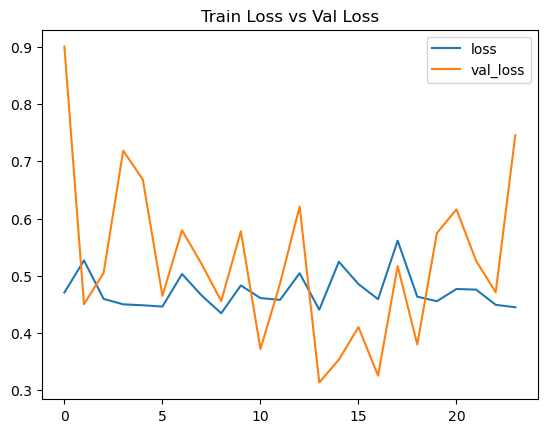

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train Loss vs Val Loss')
plt.show()

# Evaluasi Model

In [59]:
model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8776


[0.3137354552745819, 0.8775510191917419]

In [60]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.9000


[0.28330594301223755, 0.8999999761581421]

In [61]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)
score=f1_score(y_test,y_pred,average='weighted')
print(score)

2/2 [==============================] - 0s 2ms/step
0.8801843317972352


In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Fungsi untuk menampilkan evaluasi parametrik
def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.50      0.20      0.29         5

    accuracy                           0.90        50
   macro avg       0.71      0.59      0.62        50
weighted avg       0.88      0.90      0.88        50

--------------------------------------------------------------------------


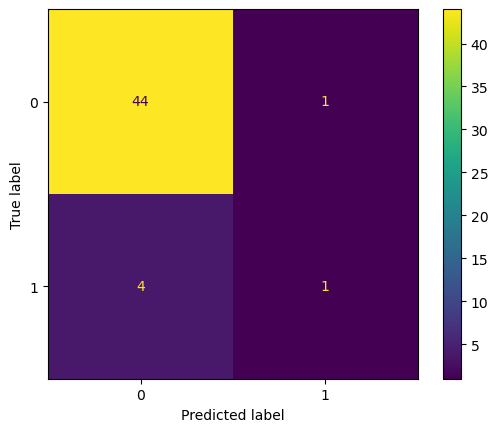

In [63]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# Save Model

In [64]:
model.save('model.h5')